In [19]:
import numpy
import scipy
import numpy as np 
import time 
import math
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook   
import cupy as cp
import cupyx.scipy.linalg
from scipy.signal import chirp

In [20]:
'Compare Hilbert Transform in CPU and GPU'


def ndim(self):
        return len(self._shape)
    
def hilbert(x, N=None, axis=-1):
    print('Hibert Transform GPU')
    x = cp.asarray(x)
    if cp.iscomplexobj(x):
        raise ValueError("x must be real.")
    if N is None:
        N = x.shape[axis]
    if N <= 0:
        raise ValueError("N must be positive.")

    Xf = cupyx.scipy.fft.fft(x, N, axis=axis)
    h = cp.zeros(N)
    if N % 2 == 0:
        h[0] = h[N // 2] = 1
        h[1:N // 2] = 2
    else:
        h[0] = 1
        h[1:(N + 1) // 2] = 2

    if x.ndim > 1:
        ind = [np.newaxis] * x.ndim
        ind[axis] = slice(None)
        h = h[tuple(ind)]
    x = cupyx.scipy.fft.ifft(Xf * h, axis=axis)
    return x



Hibert Transform GPU
--- Time for Hilbert Transform on GPU 0.0017442703247070312 seconds 
1628694116.886488


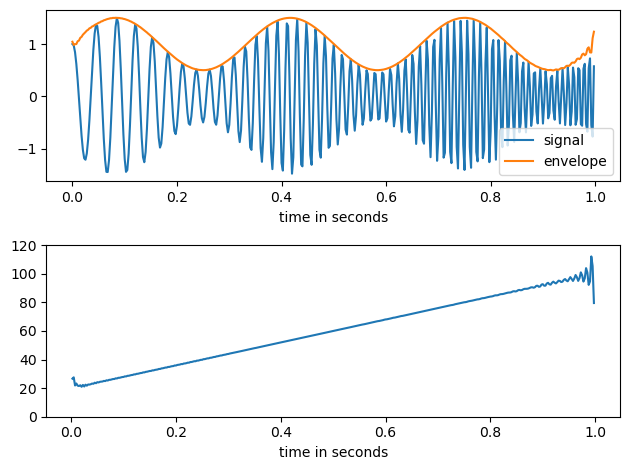

In [21]:
'Test and Plot for GPU'

duration = 1.0

fs = 400.0

samples = int(fs*duration)

t = np.arange(samples) / fs

signal = chirp(t, 20.0, t[-1], 100.0)
signal = cp.array(signal)
t = cp.array(t)
signal = signal * (1.0 + 0.5 * cp.sin(2.0*cp.pi*3.0*t) )

start_time=time.time()
analytic_signal = hilbert(signal)
print("--- Time for Hilbert Transform on GPU %s seconds " % (time.time() - start_time))
Time_GPU_HT = time.time() - start_time
print(time.time())
analytic_signal = cp.asnumpy(analytic_signal)

amplitude_envelope = np.abs(analytic_signal)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))

instantaneous_frequency = (np.diff(instantaneous_phase) /

                           (2.0*np.pi) * fs)

fig, (ax0, ax1) = plt.subplots(nrows=2)
signal = cp.asnumpy(signal)
t = cp.asnumpy(t)

ax0.plot(t, signal, label='signal')

ax0.plot(t, amplitude_envelope, label='envelope')

ax0.set_xlabel("time in seconds")

ax0.legend()

ax1.plot(t[1:], instantaneous_frequency)

ax1.set_xlabel("time in seconds")

ax1.set_ylim(0.0, 120.0)

fig.tight_layout()

plt.show()


--- Time for Hilbert Transform on CPU 0.0009062290191650391 seconds 


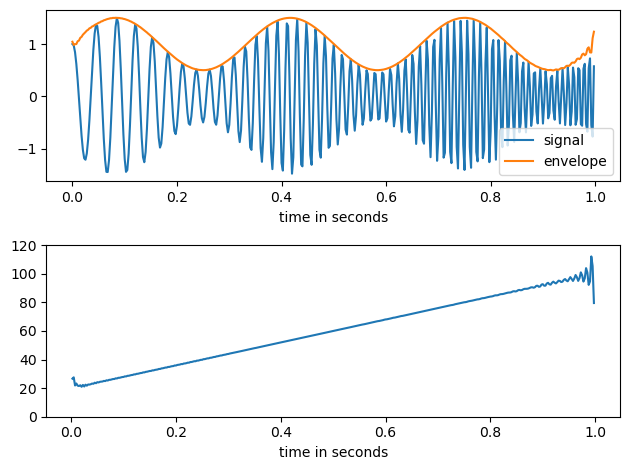

In [22]:
'Test and Plot on CPU'

duration = 1.0

fs = 400.0

samples = int(fs*duration)

t = np.arange(samples) / fs

signal = chirp(t, 20.0, t[-1], 100.0)

signal = signal * (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

start_time=time.time()
analytic_signal = scipy.signal.hilbert(signal)
print("--- Time for Hilbert Transform on CPU %s seconds " % (time.time() - start_time))
Time_CPU_HT = time.time() - start_time

amplitude_envelope = np.abs(analytic_signal)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))

instantaneous_frequency = (np.diff(instantaneous_phase) /

                           (2.0*np.pi) * fs)

fig, (ax0, ax1) = plt.subplots(nrows=2)

ax0.plot(t, signal, label='signal')

ax0.plot(t, amplitude_envelope, label='envelope')

ax0.set_xlabel("time in seconds")

ax0.legend()

ax1.plot(t[1:], instantaneous_frequency)

ax1.set_xlabel("time in seconds")

ax1.set_ylim(0.0, 120.0)

fig.tight_layout()

plt.show()


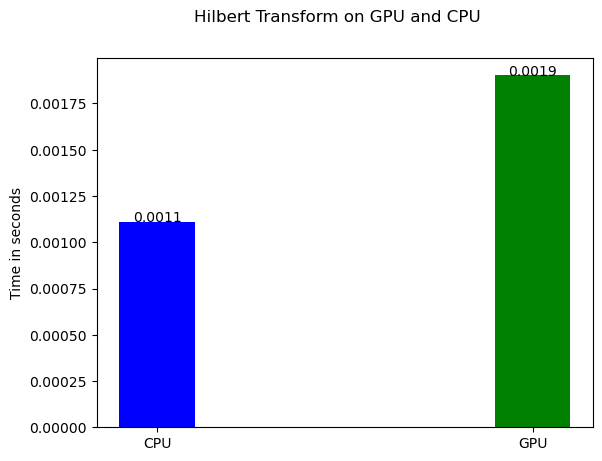

In [23]:
colors=['blue', 'green']
names = ['CPU', 'GPU']
x_hist=[Time_CPU_HT,Time_GPU_HT]
x= [0,1]

plt.bar(x, x_hist, width=0.2, align='center', color=colors)
plt.xticks(x,names)
plt.ylabel('Time in seconds')
plt.suptitle('Hilbert Transform on GPU and CPU')
for i in range(len(x_hist)):
        plt.text(i,x_hist[i],str("%.4f" % x_hist[i]), ha='center')
plt.show()